In [9]:
%matplotlib inline
import quantstats as qs
import pandas as pd
import numpy as np

In [10]:
# leer archivo de excel 

roboforex_history = pd.read_excel('ReportHistory-2112117.xlsx')
#roboforex_history =roboforex_history.replace(0.00,np.nan).dropna(axis=1,how="all")
roboforex_history.head()

,Time,Deal,Symbol,Type,Direction,Volume,Price,Order,Profit,Balance
0,2021.06.24 16:41:30,1000508,NaN,balance,NaN,NaN,NaN,NaN,40000.00,40000.00
1,2021.06.24 16:42:14,1000543,NaN,credit,in,0.00,0.00000,NaN,301.93,40301.93
2,2021.06.25 18:12:02,1039287,EURUSD,buy,in,0.41,1.19443,997180.0,0.00,40301.93
3,2021.06.25 23:02:00,1044277,EURUSD,sell,out,0.41,1.19411,1002357.0,-13.12,40287.17
4,2021.06.28 16:15:12,1071564,EURUSD,sell,in,0.49,1.19253,1026840.0,0.00,40287.17


In [11]:
# crear columna con nombre de "pct" y aplicarle un calculo de cambio porcentual a la columna de balance 

roboforex_history['pct'] = roboforex_history['Balance'].pct_change()
roboforex_history.head()

,Time,Deal,Symbol,Type,Direction,Volume,Price,Order,Profit,Balance,pct
0,2021.06.24 16:41:30,1000508,NaN,balance,NaN,NaN,NaN,NaN,40000.00,40000.00,NaN
1,2021.06.24 16:42:14,1000543,NaN,credit,in,0.00,0.00000,NaN,301.93,40301.93,0.007548
2,2021.06.25 18:12:02,1039287,EURUSD,buy,in,0.41,1.19443,997180.0,0.00,40301.93,0.000000
3,2021.06.25 23:02:00,1044277,EURUSD,sell,out,0.41,1.19411,1002357.0,-13.12,40287.17,-0.000366
4,2021.06.28 16:15:12,1071564,EURUSD,sell,in,0.49,1.19253,1026840.0,0.00,40287.17,0.000000


In [12]:
# to datetime a la columna "Time"

roboforex_history['Time'] = pd.to_datetime(roboforex_history['Time'])


In [13]:
# seteo la columna "Time" como indice

roboforex_history = roboforex_history.set_index('Time')

                           Strategy
-------------------------  ----------
Start Period               2021-06-24
End Period                 2022-08-10
Risk-Free Rate             0.0%
Time in Market             50.0%

Cumulative Return          1.2%
CAGR﹪                     1.06%

Sharpe                     0.4
Prob. Sharpe Ratio         74.4%
Smart Sharpe               0.39
Sortino                    0.75
Smart Sortino              0.72
Sortino/√2                 0.53
Smart Sortino/√2           0.51
Omega                      1.21

Max Drawdown               -1.1%
Longest DD Days            379
Volatility (ann.)          1.23%
Calmar                     0.97
Skew                       3.5
Kurtosis                   58.7

Expected Daily %           0.0%
Expected Monthly %         0.08%
Expected Yearly %          0.6%
Kelly Criterion            3.67%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.13%
Expected Shortfall (cVaR)  -0.13%

Max Consecutive Wins       4
Max Conse

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-07-27,2022-06-16,2022-08-10,379,-1.095478,-0.992806
2,2021-07-13,2021-07-26,2021-07-26,13,-0.620740,-0.498026
3,2021-07-02,2021-07-02,2021-07-02,0,-0.258741,0.000000
4,2021-07-08,2021-07-08,2021-07-12,4,-0.232864,0.000000
5,2021-06-25,2021-06-25,2021-06-29,3,-0.036624,0.000000


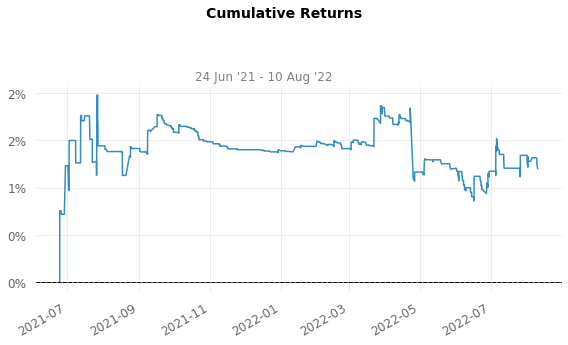

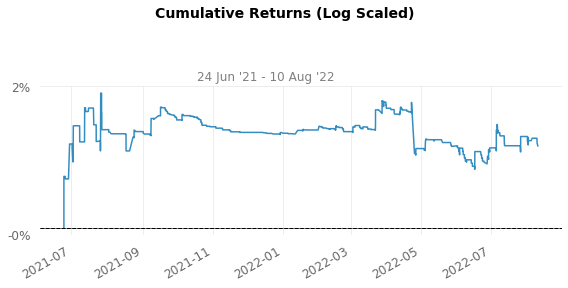

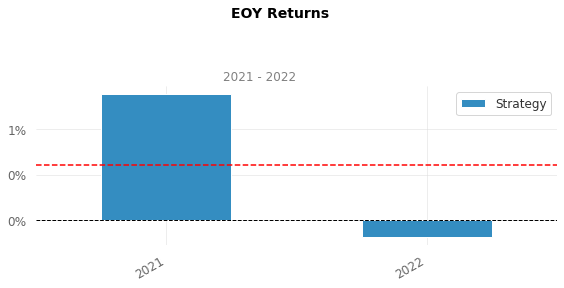

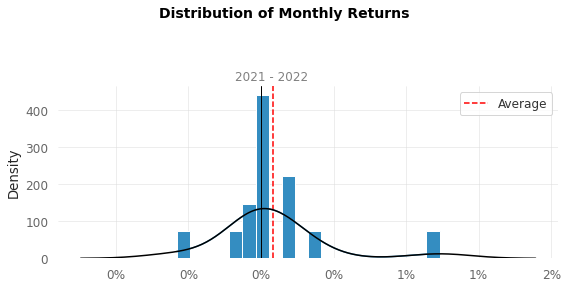

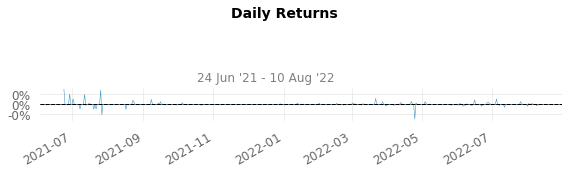

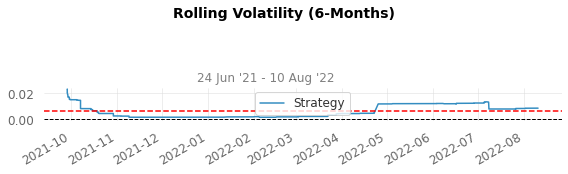

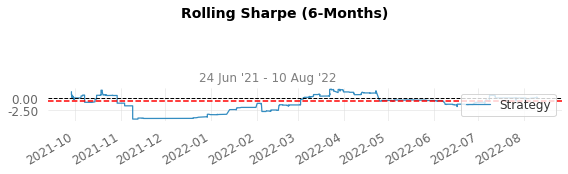

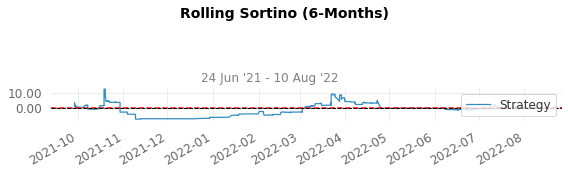

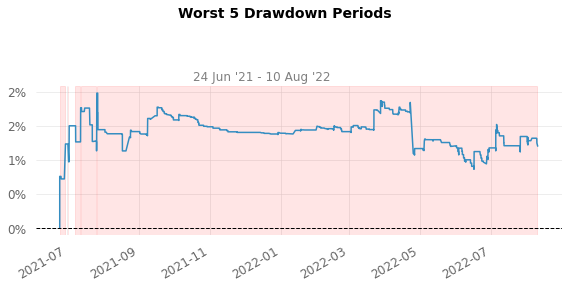

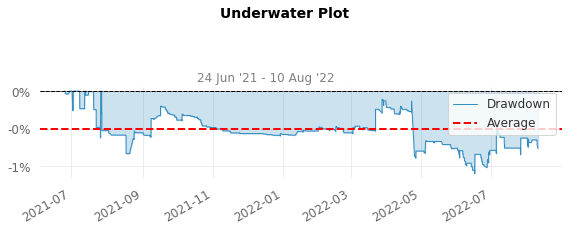

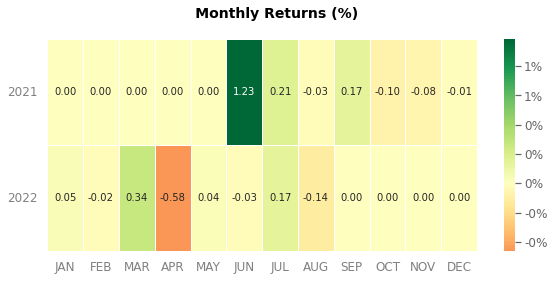

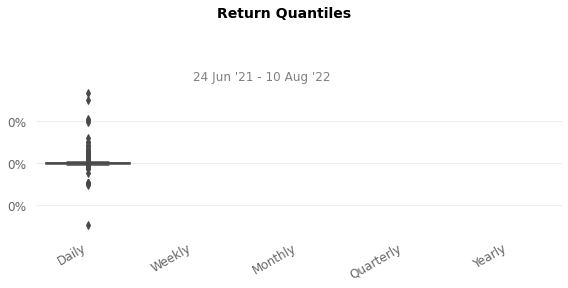

In [14]:
# aplico calculos de quantstats a la columna "pct"

qs.reports.full((roboforex_history['pct']))